# Casino Data Visualization

## Author - Geoff Ball



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename, parse_dates = [['DateFormat', 'Hour']])
# Calculate Total Number of Tables for each game
headcount_df.loc[:, 'TotalTables'] = headcount_df.loc[:, 'TablesOpen'] + headcount_df.loc[:, 'TablesClosed']
# Modify Date and Time to use grouper function later
headcount_df.loc[:, 'DateFormat_Hour'] = headcount_df.loc[:, 'DateFormat_Hour'] + ':00:00'
headcount_df.loc[:, 'DateFormat_Hour'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat_Hour'])
# set index to DateFormat_Hour and GameCode.  Multi-index to account for non-unique DateTime index.
headcount_df.set_index('DateFormat_Hour', 'GameCode', inplace = True)

headcount_df.describe()

C:\Users\gdb2n\AppData\Local\Temp/ipykernel_1784/1234639383.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  headcount_df.set_index('DateFormat_Hour', 'GameCode', inplace = True)


,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,TotalTables
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303,4.409234
std,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167,5.018419
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000,1.000000
50%,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000,2.000000
75%,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000,6.000000
max,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000,24.000000


### Dataframe Description

The Dataframe Headcount consists of 175,667 observations. There are 366 Days in the data, each day is split into, 24 hours and each hour has an observation for each game. The exception are Baccarat (BA) and Mississippi Stud (MS) which only appear in the data for a limited period, meaning most hours of most days have 20 separate observations while a small number have 22.  Baccarat and Mississippi Stud are removed from the dataset for the following exploration of the data.

In [3]:
#Remove BA and MS because they are only in a tiny percent of the data
headcount_df = headcount_df.loc[(headcount_df['GameCode'] != 'BA') & (headcount_df['GameCode'] != 'MS'), :]

In [4]:
headcount_df.head(5)

,GameCode,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,TotalTables
DateFormat_Hour,,,,,,,,
2012-04-01 00:00:00,C4,1,1,0,5,1,245,1
2012-04-01 01:00:00,C4,1,1,0,5,1,245,1
2012-04-01 02:00:00,C4,1,1,0,5,1,245,1
2012-04-01 03:00:00,C4,1,1,0,5,1,245,1
2012-04-01 04:00:00,C4,1,1,0,1,1,245,1


In [5]:
# Create Frequency Tables
headcount_df[['HeadCount', 'GameCode']].groupby(['GameCode']).sum('HeadCount')

,HeadCount
GameCode,
C4,26721
CR,190866
DH,59140
FP,101275
LI,69329
MI,24578
MQ,2225
MR,38909
ND,4939


### Further Description

In the two tables above we get a little more information about the the headcount data.  In addition to the date and the game code, we see columns related to the number of tables and number of players.  The final column, TotalTables is created by adding TablesOpen to TablesClosed.

We also see the total headcount for games in the dataset for the whole year.. We see that Big Six is the most popular game in the dataset totally over 100,000 more than the second most popular, Craps. The least popular game is Blackjack variant MQ.

In [6]:
# Function to create time series graphs
# Arguments are GameCode, frequency, and column to aggregate

def time_graph (x, f, c):
    
    #Dictionary of GameCodes for easier label reading
    game = {'BA': 'Baccarat',
            'C4': 'Blackjack variant C4',
            'CR': 'Craps',
            'DH': 'Blackjack variant DH',
            'FP': 'Four Card Poker',
            'LI': 'Let it Ride',
            'MI': 'Omaha Hi-Low',
            'MQ': 'Blackjack variant MQ',
            'MR': 'Mini-Baccarat',
            'MS': 'Mississippi Stud',
            'PG': 'Pai Gow',
            'RO': 'Roulette',
            'RR': 'Electronic Roulette',
            'S6': 'Big Six',
            'ND': 'Blackjack variant ND',
            'PA': 'Pai Gow Tiles',
            'SH': 'Blackjack variant SH',
            'TH': 'Blackjack variant TH',
            'TL': 'Blackjack variant TL',
            'TP': 'Texas Holdem Poker',
            'UT': 'Ultimate Texas Holdem',
            'WR': 'Casino War'}
    
    #Dictionary of some potential frequencies, for easier label reading
    frequency = {'H': 'Hour', 'D': 'Day', 'W': 'Week', 'M': 'Month'}
    
    temp_df = headcount_df.loc[headcount_df['GameCode']== x, c]
    temp2_df = temp_df.groupby(pd.Grouper(freq = f)).sum(c)
    
    ax = plt.figure(figsize=(9, 6)).gca() # define axis
    temp2_df.plot(ax=ax)
    
    ax.set_title(game[x] + ' graphed by ' + frequency[f], fontsize = 'xx-large') # Give the plot a main title
    ax.set_ylabel(c, fontsize = 'xx-large')# Set text for y axis
    ax.set_xlabel(frequency[f], fontsize = 'xx-large')
    
    

### Time Series

Viewing the data as a graph over time may reveal interesting trends. To do this, the data was graphed by game in a facet grid.  The result was too unwieldy to present, but some representative graphs are featured below.

#### Spikes

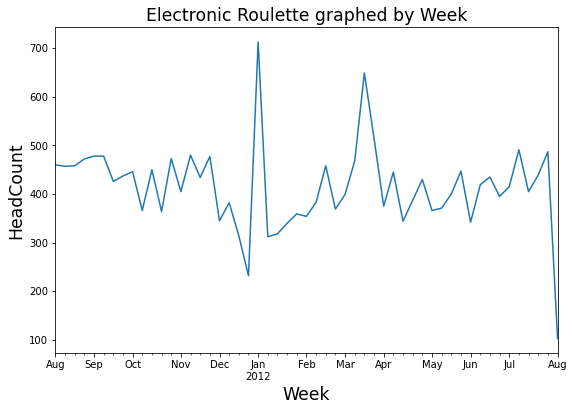

In [7]:
time_graph ('RR', 'W', 'HeadCount')

Several of the games show prominent spikes, such as the graph of Electronic Roulette above.  Headcount is aggregated by week in order to reduce noise, and we can see two prominent spikes, one in December-January, and another in March-April.  While it is tempting to dismiss these as outliers, and that may ultimately prove to be proper, what is truly interesting is that they show up in the graphs of other games as well, but importantly, not all games.  The same pattern shows up in Four Card Poker, and Roulette, Blackjack variant SH. At the same time, some games, such as, Craps, Big Six, Blackjack variant TH, and Texas Hold'em have only the March-April spike.

While these spikes may ultimately be outliers, the cause of the spikes would seem to warrant further investigation.


#### Trends

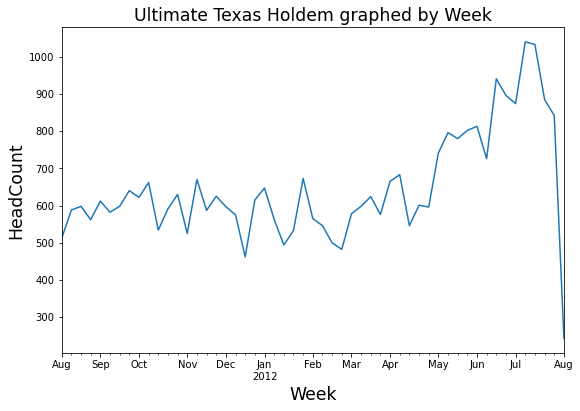

In [8]:
time_graph ('UT', 'W', 'HeadCount')

Some of the games show changes in popularity over the course of the year.  While the time series for many games show sharp peaks and valleys throughout the year, a show obvious trends.  For instance in the graph above, Ultimate Texas Hold'em, shows an increase in popularity beginning in the spring.  Craps, Omaha Hi-Low, and Blackjack variant C4,  also show this trend.  Others, such as Blackjack variant SH and Blackjack variant TH appear to have downward trends.

One question that might occur to you at this point is, does the casino respond to these trends?  The answer appears to be yes.  The graph below displays the number of tables dedicated ot Ultimate Texas Hold'em.  When the increase in popularity is apparent in the headcount graph, we see the number of tables jumps from one to two. This increase in the number of tables also shows up in other games with the upward trend.  By the same token, games with downward trends, such as Blackjack variant SH and Blackjack variant TH, see a reduction in the number of dedicated tables.  This relationship is to be expected as the casino responds to the forces of supply and demand.

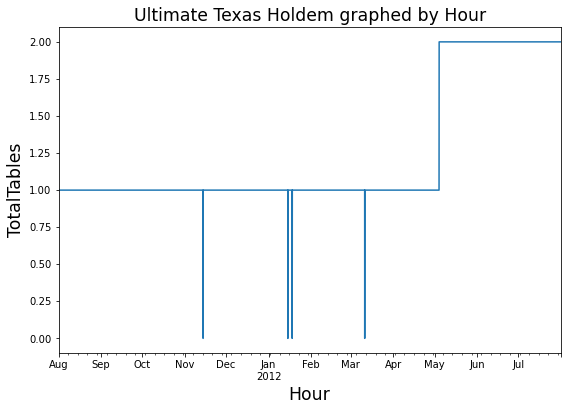

In [9]:
time_graph ('UT', 'H', 'TotalTables')

### A Qick Restart and a Warning

For the next part I need hour to be separate from the index, so the data is reloaded.  Once this block is run, some of the code above will no longer work.

In [10]:
headcount_df = pd.read_csv(filename)

headcount_df.loc[:, 'TotalTables'] = headcount_df.loc[:, 'TablesOpen']\
            + headcount_df.loc[:, 'TablesClosed']

headcount_df.loc[:, 'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
#headcount_df.set_index('DateFormat', inplace = True, drop=False)
#Remove BA and MS because they are only in a tiny percent of the data
headcount_df = headcount_df.loc[(headcount_df['GameCode'] != 'BA') &\
            (headcount_df['GameCode'] != 'MS'), :]

#### Busy Times at the Casino

Text(0.5, 1.0, 'Time Graph of Headcount by Hour and Day')

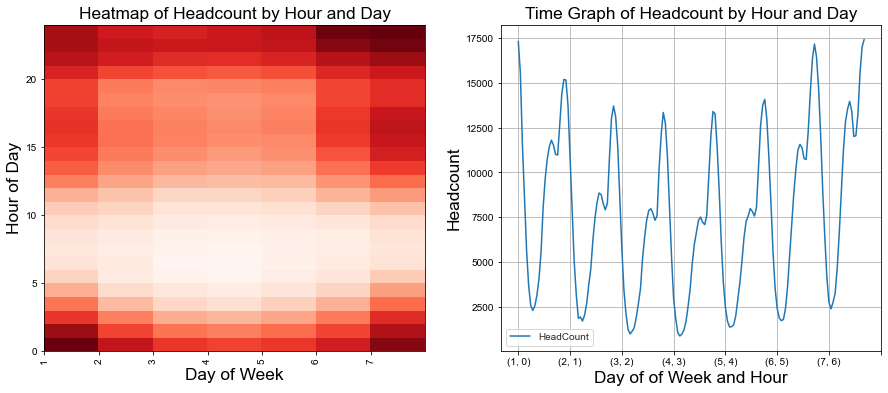

In [11]:
by_hour = pd.crosstab(headcount_df.loc[:, 'Hour'], headcount_df.loc[:, 'DayOfWeek'], 
                      values = headcount_df.loc[:, 'HeadCount'], aggfunc = 'sum')

fig, ax = plt.subplots(1,2, sharey = False, figsize=(15,6)) # define axis
sbs.set_style("whitegrid")

# Heatmap Code
ax[0].pcolor(by_hour, cmap = 'Reds')
ax[0].set_xticks(range(by_hour.shape[1]))
ax[0].set_xticklabels(by_hour.columns, rotation=90)
ax[0].set_xlabel('Day of Week', fontsize = 'xx-large')
ax[0].set_ylabel('Hour of Day', fontsize = 'xx-large')
ax[0].set_title('Heatmap of Headcount by Hour and Day', fontsize = 'xx-large')

# Line Graph Code
headcount2_df = headcount_df[['Hour', 'DayOfWeek', 'HeadCount']]\
        .groupby(['DayOfWeek', 'Hour']).sum('HeadCount').copy()
headcount2_df.plot(ax=ax[1])
ax[1].set_xlabel('Day of of Week and Hour', fontsize = 'xx-large')
ax[1].set_ylabel('Headcount', fontsize = 'xx-large')
ax[1].set_title('Time Graph of Headcount by Hour and Day', fontsize = 'xx-large')

The two graphs above show the same information displayed in different ways.  Both show the headcount in the casino by day and hour.

The image on the left is a heatmap, where darker colors correspond to a higher headcount. On the vertical axis, the block at zero is the hour between Midnight and 1AM, the block on the top, 23, is the hour between 11PM and Midnight. On the horizontal axis the numbers correspond to days of the week with one being Sunday and seven being Saturday.

A clear pattern emerges when we look at the data in this way.  The light band near the bottom corresponds to the morning hours and there is very little activity between 5AM and 10AM. Headcount begins to increase in the late morning and continues until late at night.  It is also apparent that the four corners of the heatmap are the darkest, this shows that the busiest times at the casino are weekend nights.  Somewhat surprisingly, Sunday night is relatively dark, I guess people are not too worried about getting up for work on Monday.

The reason I have also included the graph on the right is that it shows one interesting feature that is easy to miss in the heatmap. namely the tiny spike in the middle of the daily upward trend. By looking at the heatmap, we can see that the darkest colors of every day, including weekdays, happens around Midnight, therefor the peaks on the right are also at midnight.  It is not quite as easy to see where the earlier, smaller peak occurs, but now that we know to look for it, we can see that every day, the hour between 4PM and 5PM is slightly darker than the next hour.  This may be due to a promotion that takes place around that time.  An after work bump does not fully explain it, since it occurs on Saturday and Sunday too.  In any case, it may be worth further exploration.

#### Table Usage

Text(0.5, 1.0, 'Average Percent Extra Tables by Game and Hour')

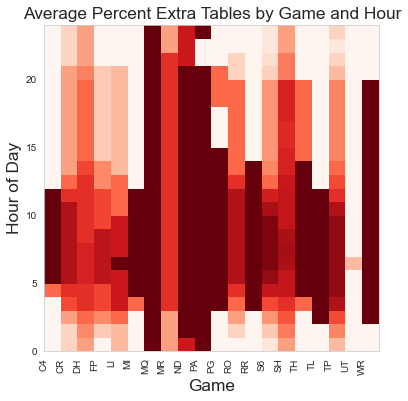

In [12]:
headcount_df.loc[:, '%ExtraTables'] = (headcount_df.loc[:, 'TotalTables']\
                - headcount_df.loc[:, 'TablesOcc']) / headcount_df.loc[:, 'TotalTables']

by_game = pd.crosstab(headcount_df.loc[:, 'Hour'], headcount_df.loc[:, 'GameCode'],\
                      values = headcount_df.loc[:, '%ExtraTables'], aggfunc = 'median')

ax = plt.figure(figsize=(6, 6)).gca() # define axis
ax.pcolor(by_game, cmap = 'Reds')
ax.set_xticks(range(by_game.shape[1]))
ax.set_xticklabels(by_game.columns, rotation=90)
ax.set_xlabel('Game', fontsize = 'xx-large')
ax.set_ylabel('Hour of Day', fontsize = 'xx-large')
ax.set_title('Average Percent Extra Tables by Game and Hour', fontsize = 'xx-large')

The heatmap above shows the average percent of unused tables in the casino organized by game and hour.  Darker colors indicate that a higher percentage of the total tables designated for each game, are unused, i.e. closed or open but unoccupied.  The dark colors between 5AM and 10AM are entirely expected, headcount is low across the casino, so there will be many empty tables.  More interesting is what happens at the top of the graph.  We know that as Midnight approaches, the casino gets more crowded, so the darker colors at the near the top indicate that some tables for some games regularly go unused, even at peak hours.  In particular, Blackjack variant MQ, Blackjack variant ND, and Pai Gow Tiles seem to be under used.  This may give us clues as to the casino's resource allocation.

### Key Points

1. The most popular game in the casino is Big Six
2. When graphed over time, some interesting patterns emerge, positive and negative trends for some games, and regular spikes in headcount that appear for some games and not for others.
3. The busiest times at the casino are weekend nights, and even on weekdays Midnight is the most popular time.
4. Some games have tables that go unused even during peak hours.

### References

Code for the plots was modified from the Data Exploration Part 2 lab assignment.